In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sms

In [3]:
data=pd.read_csv("airline_passengers.csv")

In [4]:
data.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [5]:
data.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [6]:
data.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [7]:
data.dropna(inplace=True,axis=0)

In [11]:
data.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [13]:
data['Month']=pd.to_datetime(data['Month'])

In [14]:
data

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0
...,...,...
139,1960-08-01,606.0
140,1960-09-01,508.0
141,1960-10-01,461.0
142,1960-11-01,390.0


In [15]:
data.set_index('Month',inplace=True)

In [16]:
data

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
...,...
1960-08-01,606.0
1960-09-01,508.0
1960-10-01,461.0


<Axes: xlabel='Month'>

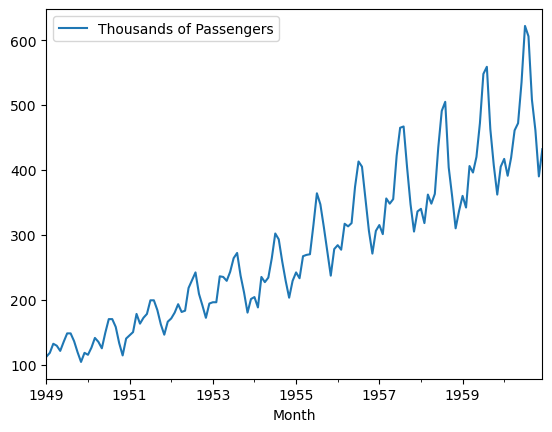

In [17]:
data.plot()

In [59]:
from statsmodels.tsa.stattools import adfuller

In [60]:
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic : {}'.format(result[0]))
    print('p-value : {}'.format(result[1]))
    if result[1] <= 0.05:
        print("Reject Null Hypothesis — Series is Stationary")
    else:
        print("The series has a unit root — Not Stationary")

In [61]:
adf_test(data['Thousands of Passengers'])


ADF Statistic : 0.7923399959692567
p-value : 0.991511509628866
The series has a unit root — Not Stationary


In [62]:
#Inorder to meke stationary we used 
#differencing techinques

In [63]:
#Value of Thousand of Passengers shift by 1
data['Passanger First Difference']=data['Thousands of Passengers']-data['Thousands of Passengers'].shift(1)

In [64]:
data

,Thousands of Passengers,Passanger First Difference,Passanger Second Difference
Month,,,
1949-02-01,118.0,NaN,NaN
1949-03-01,132.0,14.0,NaN
1949-04-01,129.0,-3.0,118.0
1949-05-01,121.0,-8.0,132.0
1949-06-01,135.0,14.0,129.0
...,...,...,...
1960-08-01,606.0,-16.0,535.0
1960-09-01,508.0,-98.0,622.0
1960-10-01,461.0,-47.0,606.0


In [65]:
adf_test(data['Passanger First Difference'].dropna())

ADF Statistic : -2.833425645565316
p-value : 0.05365549915891007
The series has a unit root — Not Stationary


In [66]:
data['Passanger Second Difference']=data['Passanger First Difference']-data['Passanger First Difference'].shift(1)

In [67]:
data

,Thousands of Passengers,Passanger First Difference,Passanger Second Difference
Month,,,
1949-02-01,118.0,NaN,NaN
1949-03-01,132.0,14.0,NaN
1949-04-01,129.0,-3.0,-17.0
1949-05-01,121.0,-8.0,-5.0
1949-06-01,135.0,14.0,22.0
...,...,...,...
1960-08-01,606.0,-16.0,-103.0
1960-09-01,508.0,-98.0,-82.0
1960-10-01,461.0,-47.0,51.0


In [84]:
adf_test(data['Passanger Second Difference'].dropna())

ADF Statistic : -16.313032556105625
p-value : 3.1821210990547044e-29
Reject Null Hypothesis — Series is Stationary


In [95]:
#This is a seasonl data so used the 12 months

In [96]:
data['Passanger 12 Difference']=data['Passanger Second Difference']-data['Passanger Second Difference'].shift(12)

In [104]:
data


,Thousands of Passengers,Passanger First Difference,Passanger Second Difference,Passanger 12 Difference
Month,,,,
1949-02-01,118.0,NaN,NaN,NaN
1949-03-01,132.0,14.0,NaN,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
1949-06-01,135.0,14.0,22.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,-38.0
1960-09-01,508.0,-98.0,-82.0,25.0
1960-10-01,461.0,-47.0,51.0,11.0


In [97]:
adf_test(data['Passanger 12 Difference'].dropna())

ADF Statistic : -8.094627565989008
p-value : 1.3494044189131907e-12
Reject Null Hypothesis — Series is Stationary


In [98]:
from statsmodels.graphics.tsaplots import plot_acf ,plot_pacf

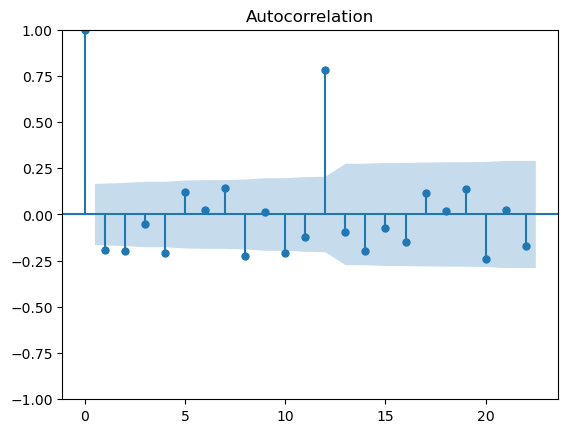

In [99]:
acf=plot_acf(data['Passanger Second Difference'].dropna())

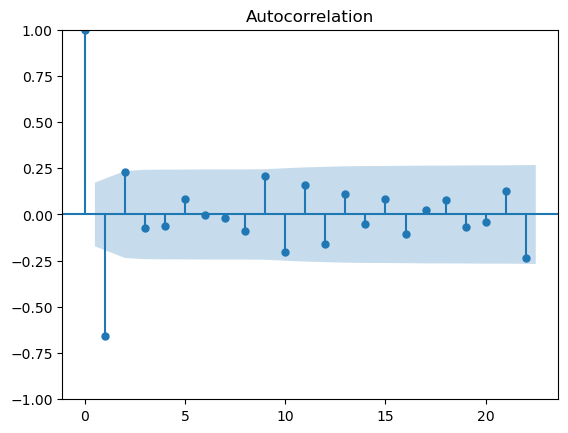

In [100]:
acf12=plot_acf(data['Passanger 12 Difference'].dropna())

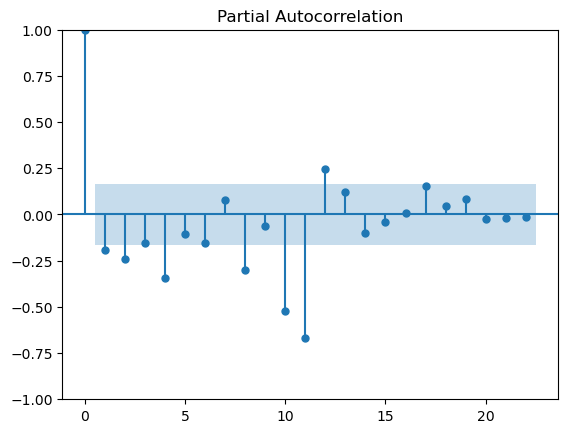

In [105]:
pacf=plot_pacf(data['Passanger Second Difference'].dropna())

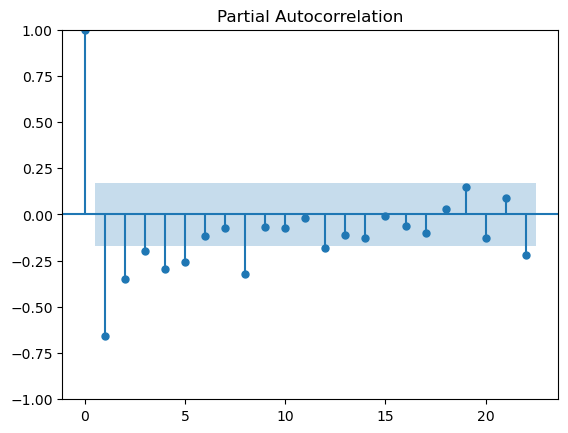

In [107]:
pacf12=plot_pacf(data['Passanger 12 Difference'].dropna())

In [108]:
data

,Thousands of Passengers,Passanger First Difference,Passanger Second Difference,Passanger 12 Difference
Month,,,,
1949-02-01,118.0,NaN,NaN,NaN
1949-03-01,132.0,14.0,NaN,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
1949-06-01,135.0,14.0,22.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,-38.0
1960-09-01,508.0,-98.0,-82.0,25.0
1960-10-01,461.0,-47.0,51.0,11.0


In [119]:
from datetime import datetime ,timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [120]:
train_data = data[:train_dataset_end]
test_data = data[train_dataset_end+ timedelta(days=1):test_dataset_end]

In [121]:
#predictions
pred_start_data=test_data.index[0]
pred_end_data=test_data.index[-1]

In [122]:
test_data

,Thousands of Passengers,Passanger First Difference,Passanger Second Difference,Passanger 12 Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,-22.0
1956-02-01,277.0,-7.0,-13.0,9.0
1956-03-01,317.0,40.0,47.0,4.0
1956-04-01,313.0,-4.0,-44.0,-12.0
1956-05-01,318.0,5.0,9.0,10.0
1956-06-01,374.0,56.0,51.0,7.0
1956-07-01,413.0,39.0,-17.0,-21.0
1956-08-01,405.0,-8.0,-47.0,19.0
1956-09-01,355.0,-50.0,-42.0,-24.0


In [132]:
from statsmodels.tsa.arima.model import ARIMA


In [133]:
train_data

,Thousands of Passengers,Passanger First Difference,Passanger Second Difference,Passanger 12 Difference
Month,,,,
1949-02-01,118.0,NaN,NaN,NaN
1949-03-01,132.0,14.0,NaN,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
1949-06-01,135.0,14.0,22.0,NaN
...,...,...,...,...
1955-08-01,347.0,-17.0,-66.0,-19.0
1955-09-01,312.0,-35.0,-18.0,7.0
1955-10-01,274.0,-38.0,-3.0,-7.0


In [171]:
model_ARIMA=ARIMA(train_data['Thousands of Passengers'],order=(4,2,3))

/Applications/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [172]:
model_ARIMA_fit=model_ARIMA.fit()

In [173]:
model_ARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   83
Model:                      ARIMA(4, 2, 3)   Log Likelihood                -352.136
Date:                     Sun, 20 Apr 2025   AIC                            720.273
Time:                             14:56:42   BIC                            739.428
Sample:                         02-01-1949   HQIC                           727.958
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3349      0.136     -2.470      0.013      -0.601      -0.069
ar.L2         -0.8534      0.136     -6.297      0.000      -1.119      -0.588
ar.L3          0.1158      0.135      0.857      0.391      -0.149       0.381
ar.L4         -0.4235      0.136     -3.121      0.002      -0.690      -0.158
ma.L1         -0.2960     74.443     -0.004      0.997    -146.201     145.609
ma.L2          0.2878     52.390      0.005      0.996    -102.395     102.971
ma.L3         -0.9917     73.920     -0.013      0.989    -145.873     143.890
sigma2       308.9695    2.3e+04      0.013      0.989   -4.48e+04    4.54e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):                 0.60
Prob(Q):                              0.63   Prob(JB):                         0.74
Heteroskedasticity (H):               3.58   Skew:                             0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [174]:
#Prediction
pred_start_data=test_data.index[0]
pred_end_data=test_data.index[-1]
print(pred_start_data)
print(pred_end_data)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [175]:
pred=model_ARIMA_fit.predict(start=pred_start_data,end=pred_end_data)
residuals=test_data['Thousands of Passengers']-pred

In [176]:
residuals

Month
1956-01-01    -18.799094
1956-02-01    -15.848735
1956-03-01     16.503876
1956-04-01     16.005882
1956-05-01     32.953584
1956-06-01     71.802962
1956-07-01    104.933852
1956-08-01    108.374864
1956-09-01     47.445054
1956-10-01     -6.135054
1956-11-01    -31.524286
1956-12-01     -7.006347
1957-01-01     -3.659941
1957-02-01     -8.829610
1957-03-01     37.692820
1957-04-01     23.720025
1957-05-01     38.310916
1957-06-01     98.083458
1957-07-01    134.863821
1957-08-01    143.462220
1957-09-01     74.447482
1957-10-01     11.110660
1957-11-01    -25.296998
1957-12-01      0.685958
1958-01-01     -1.653614
1958-02-01    -18.978634
1958-03-01     20.855502
1958-04-01      0.590876
1958-05-01     19.409311
1958-06-01     87.953424
1958-07-01    137.830181
1958-08-01    154.864458
1958-09-01     50.995504
1958-10-01      0.060571
1958-11-01    -46.619776
1958-12-01    -22.010036
1959-01-01     -4.722205
1959-02-01    -21.048167
1959-03-01     40.945769
1959-04-01     25.4

<Axes: ylabel='Density'>

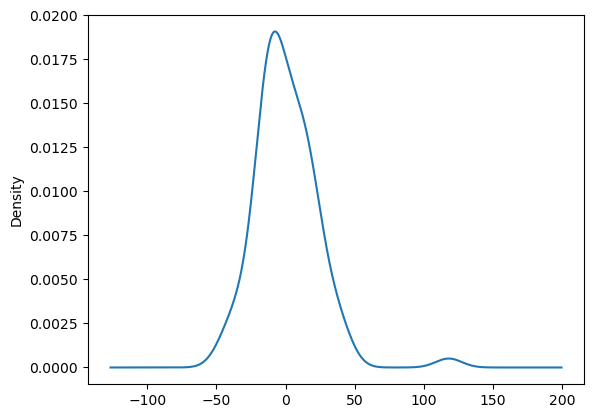

In [177]:
model_ARIMA_fit.resid.plot(kind='kde')

In [178]:
test_data['Predicted_ARIMA']=pred

/var/folders/8t/1xgb90cn3ns84sssmr9z_bf40000gn/T/ipykernel_40479/95659616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<Axes: xlabel='Month'>

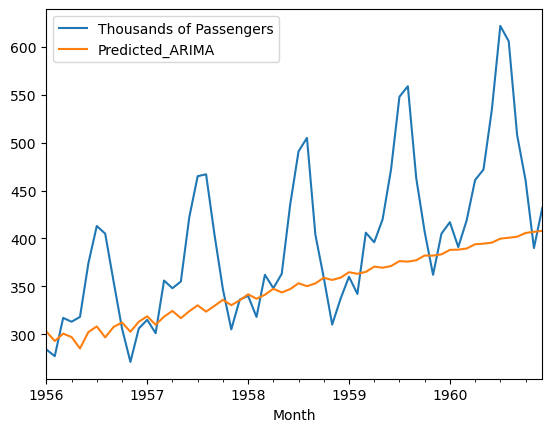

In [179]:
test_data[['Thousands of Passengers','Predicted_ARIMA']].plot()

In [180]:
#Create a SARIMA models
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [181]:
model_SARIMAX=SARIMAX(train_data['Thousands of Passengers'],order=(3,0,5),seasonal_order=(0,1,0,12))

/Applications/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [182]:
model_SARIMAX_fit=model_SARIMAX.fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.18080D+00    |proj g|=  4.79009D-02

At iterate    5    f=  3.17440D+00    |proj g|=  2.31468D-02

At iterate   10    f=  3.17062D+00    |proj g|=  3.17185D-03

At iterate   15    f=  3.17011D+00    |proj g|=  3.94002D-03

At iterate   20    f=  3.16962D+00    |proj g|=  2.46992D-02

At iterate   25    f=  3.16256D+00    |proj g|=  5.62487D-02

At iterate   30    f=  3.15922D+00    |proj g|=  1.40963D-02

At iterate   35    f=  3.15718D+00    |proj g|=  1.72484D-03

At iterate   40    f=  3.15709D+00    |proj g|=  1.99640D-03

At iterate   45    f=  3.15695D+00    |proj g|=  4.53243D-03

At iterate   50    f=  3.15660D+00    |proj g|=  7.92633D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Applications/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [183]:
model_SARIMAX_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                   83
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -261.998
Date:                             Sun, 20 Apr 2025   AIC                            541.996
Time:                                     14:56:48   BIC                            562.360
Sample:                                 02-01-1949   HQIC                           550.094
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6029      0.931      0.648      0.517      -1.222       2.428
ar.L2          0.8377      0.235      3.572      0.000       0.378       1.297
ar.L3         -0.4624      0.889     -0.520      0.603      -2.205       1.280
ma.L1          0.1758     34.989      0.005      0.996     -68.402      68.754
ma.L2         -0.5318     29.280     -0.018      0.986     -57.919      56.856
ma.L3         -0.0967     10.360     -0.009      0.993     -20.403      20.209
ma.L4         -0.1354     13.621     -0.010      0.992     -26.832      26.561
ma.L5          0.2535      8.949      0.028      0.977     -17.286      17.794
sigma2        89.1348   3129.681      0.028      0.977   -6044.928    6223.198
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 2.82
Prob(Q):                              0.91   Prob(JB):                         0.24
Heteroskedasticity (H):               2.08   Skew:                             0.47
Prob(H) (two-sided):                  0.08   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""